Convert igor to python

In [2]:
#set plots to show inline
%matplotlib inline

#import necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pathlib
import processing_pypeline.readScanM as rsm
import napari
import igorwriter
#from igor import binarywave

In [3]:

class get_stack:
    # This class is used in the .smh+.smp to .tiff conversion process, 
    # as well as for constructing the trigger signal. 
    def __init__(self, file_path):
        print("Getting stack...")
        self.file_path = pathlib.Path(file_path)
        self.data_directory = self.file_path.parent
        # def change_dir(path_of_file):
        #     prev_path = pathlib.Path.cwd() #Make note of current (will be previous) working directory
        #     print("Making note of old path: {}".format(prev_path))
        #     data_path = pathlib.Path(r'{}'.format(path_of_file)) #Construct data path
        #     new_path = pathlib.Path(data_path).resolve().parent #Set directory to file location 
        #     print("Changing path to: {}".format(new_path))
        #     os.chdir(new_path)#Change directory
        #     print("Done")
        #     return prev_path
        # prev_path = change_dir(path_of_file = self.data_directory)
        print("Getting data from {}".format(self.file_path))
        self.filename = self.file_path.name
        print("Reading header...")
        ## This part of script provided by Andre Chagas 
        self.dicHeader = rsm.read_in_header(filePath = self.file_path.with_suffix('.smh'))#+".smh")
        print("Header read.")
        self.frameN = int(self.dicHeader["NumberOfFrames"])
        self.frameC = int(self.dicHeader["FrameCounter"])
        self.frameB = int(self.dicHeader["StimBufPerFr"]) #Buffer between stimuli (mirror back into place)
        self.frameH = int(self.dicHeader["FrameHeight"])
        self.frameW = int(self.dicHeader["FrameWidth"])
        print("Reading data...")
        channel_dict = rsm.read_in_data(filePath=self.file_path.with_suffix('.smp'), header=self.dicHeader,
                                  readChan1=True, readChan2=True, 
                                  readChan3=True, readChan4=True)
        print("Data retrieved.")
        print("Converting to serialised data...")
        #Convert data from serialized to frames
        self.channel1 = rsm.to_frame(channel_dict["chan1"], frameTotal=self.frameN, 
                      frameCounter=self.frameC, frameBuffer=self.frameB, 
                      frameHeight=self.frameH, frameWidth=self.frameW)

        self.channel2 = rsm.to_frame(channel_dict["chan2"], frameTotal=self.frameN, 
                      frameCounter=self.frameC, frameBuffer=self.frameB, 
                      frameHeight=self.frameH, frameWidth=self.frameW)
        # self.channels_interleved = np.empty((self.channel1.size + self.channel2.size,), dtype=self.channel1.dtype)
        print("Conversion complete.")
        """Use: https://numpy.org/doc/stable/reference/generated/numpy.dstack.html"""
        # os.chdir(prev_path) # Go back where we came from
        print("Reverting path.")

In [4]:
test = get_stack(r"C:\Users\Simen\Downloads\0_0_ColorSWN_200_0.smp")

Getting stack...
Getting data from C:\Users\Simen\Downloads\0_0_ColorSWN_200_0.smp
Reading header...
Header read.
Reading data...
Data retrieved.
Converting to serialised data...
Conversion complete.
Reverting path.


In [10]:
test.dicHeader["FrameWidth"]

'200'

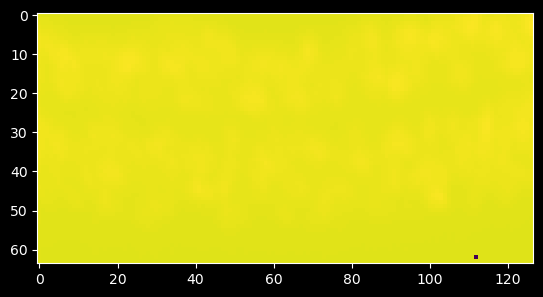

In [13]:
plt.imshow(np.average(test.channel1[:, :, 33:-40], axis = 0))

In [12]:
igor_channel1 = igorwriter.IgorWave(np.swapaxes(test.channel1[:, :, 33:-40], 0, 2))
igor_channel1.save('mywave.ibw')

In [4]:
#import Andre's package from local file "processing_pypeline"
import processing_pypeline.readScanM as rsm
print(rsm)

<module 'processing_pypeline.readScanM' from 'c:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\large_stack_prep\\processing_pypeline\\readScanM.py'>


In [27]:
#get the current directory and add the filename
filename = r"D:\Igor analyses\230613\0_1_ColorSWN_200_0"

In [28]:
#Grab header info from smh file
dicHeader = rsm.read_in_header(filePath = filename+".smh")

In [29]:
dicHeader

{'ComputerName': ' cssd901260',
 'UserName': ' TestAccount',
 'OriginalPixelDataFileName': ' C:\\Users\\TestAccount\\Documents\\WaveMetrics\\Igor Pro 6 User Files\\ScanM_Data\\0_1_ColorSWN_200_0.smp',
 'DateStamp': ' 2023-6-13',
 'TimeStamp': ' 18-37-20-219',
 'ScanMproductVersionAndTargetOS': ' 0.1.36.63_4',
 'CallingProcessPath': ' C:\\Program Files (x86)\\WaveMetrics\\Igor Pro Folder\\Igor.exe',
 'CallingProcessVersion': ' 6.3.7.2',
 'PixelSizeInBytes': ' 2',
 'StimulusChannelMask': ' 15',
 'MinVoltsAO': ' -4.000000',
 'MaxVoltsAO': ' 4.000000',
 'MaxStimulusBufferMapLength': ' 1',
 'Channel_0_StimulusBufferMapEntry_#0': ' 0',
 'Channel_1_StimulusBufferMapEntry_#0': ' 1',
 'Channel_2_StimulusBufferMapEntry_#0': ' 2',
 'Channel_3_StimulusBufferMapEntry_#0': ' 3',
 'NumberOfStimulusBuffers': ' 4',
 'StimulusBufferLength_#0': ' 12800',
 'StimulusBufferLength_#1': ' 12800',
 'StimulusBufferLength_#2': ' 12800',
 'StimulusBufferLength_#3': ' 12800',
 'InputChannelMask': ' 5',
 'Channel_0

In [30]:
#Grab information from the header
frameN = int(dicHeader["NumberOfFrames"])
frameC = int(dicHeader["FrameCounter"])
#Buffer between stimuli (mirror back into place)
frameB = int(dicHeader["StimBufPerFr"])
frameH = int(dicHeader["FrameHeight"])
frameW = int(dicHeader["FrameWidth"])

In [31]:
#Read in binary data
#Output is dictionary where each key is one channel
#Channel1 = green channel?, channel 3 = triggers
output = rsm.read_in_data(filePath=filename+".smp", header=dicHeader,
                          readChan1=True, readChan2=True, 
                          readChan3=True, readChan4=True)

In [55]:
print(output)

{'chan1': array([-10016, -10030, -10030, ...,      0,      0,      0]), 'chan2': array([-10936, -10923, -10923, ...,      0,      0,      0])}


In [56]:
#Convert data from serialized to frames
#Only for channel 1
frame1 = rsm.to_frame(output["chan1"], frameTotal=frameN, 
                      frameCounter=frameC, frameBuffer=frameB, 
                      frameHeight=frameH, frameWidth=frameW)

In [57]:
#Convert data from channel 3 to detect triggers
#or channel 2????
frame3 = rsm.to_frame(output["chan2"], frameTotal=frameN,
                      frameCounter=frameC, frameBuffer=frameB,
                      frameHeight=frameH, frameWidth=frameW)
#which trigger mode to use??
indexex, trigArray1 = rsm.trigger_detection(frameData=frame3,
                                            triggerLevel=220,
                                            triggerMode=2)

In [58]:
print(np.shape(frame1))

(266, 160, 500)


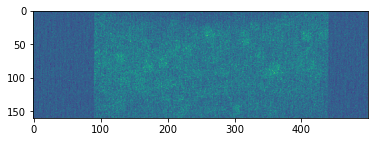

In [59]:
image1=frame1[78]
plt.imshow(image1)

-10006.453904761906


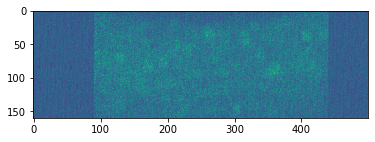

In [60]:
#take mean of an area of background and subtract from whole image.
background1 = image1[:-10,:-10]
meanBackground = np.mean(background1)
print(meanBackground)
image1Back = image1 - meanBackground
plt.imshow(image1Back)

NameError: name 'frame' is not defined

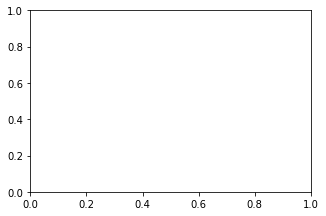

In [61]:
#Slider 3D np array
import matplotlib.pyplot as plt
import pylab
from matplotlib.widgets import Slider

ax = pylab.subplot(111)
pylab.subplots_adjust(left=0.25, bottom=0.25)

frame0 = 0
l = pylab.imshow(frame1[frame,:,:]) #shows 256x256 image, i.e. 0th frame

axcolor = 'blue'
axframe = pylab.axes([0.25, 0.1, 0.65, 0.03])
sframe = Slider(axframe, 'Frame', 0, 500, valinit=frame)

def update(val):
    frame = np.around(sframe.val)
    l.set_data(frame1[frame,:,:])
    fig.canvas.draw_idle()

sframe.on_changed(update)

pylab.show()

In [ ]:
#for i in array.shape()

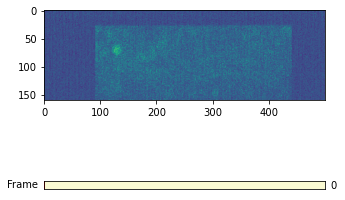

In [62]:

#calling it a second time may prevent some graphics errors
#%matplotlib notebook  
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
#frame1 3D array
#initial parameters
frame_init = 0

#create figure and line we will manipulate
ax = pylab.subplot(111)
line = pylab.imshow(frame1[frame_init,:,:])

axcolour = 'lightgoldenrodyellow'
ax.margins(x=0)

#adjust main plot to make room for sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

#horizontal slider
axslide = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolour)
slider = Slider(
    ax=axslide, label='Frame', valmin=0, valmax=499, valinit=frame_init)

#function to be called anytime slider changed
def update(val):
    frame = np.around(slider.val)
    line.set_data(frame1[frame,:,:])
    fig.canvas.draw_idle()
    
#register update on slider
slider.on_changed(update)

plt.show()

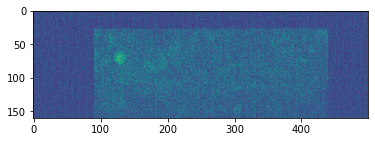

In [63]:
plotting(0)

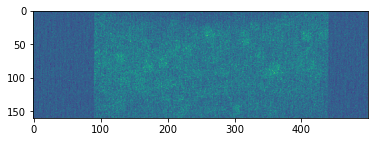

In [64]:
plotting(78)

In [65]:
import ipywidgets as widgets

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=np.shape(frame1)[0],
    step=1,
    description='Frame:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [66]:
slider.value

0

In [67]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact(plotting, frame=slider.value)

interactive(children=(IntSlider(value=0, description='frame', max=1), Output()), _dom_classes=('widget-interac…

<function __main__.plotting(frame)>

In [68]:
interact(plotting, frame=widgets.IntSlider(min=0, max=np.shape(frame1)[0]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='frame', max=265), Output()), _dom_classes=('widget-inter…

<function __main__.plotting(frame)>

-10006.453904761906


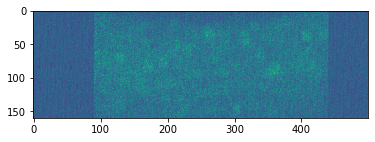

In [69]:
#take mean of an area of background and subtract from whole image.
background1 = image1[:-10,:-10]
meanBackground = np.mean(background1)
print(meanBackground)
image1Back = image1 - meanBackground
plt.imshow(image1Back)

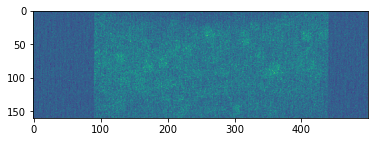

In [70]:
background = image1[400:450, 150:]
meanBackground = np.mean(background)
image1[image1 < meanBackground] = 0
plt.imshow(image1)

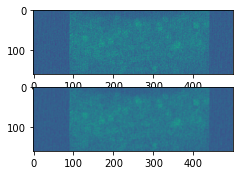

In [89]:
#Blurring / Low-pass filter / Gaussian filter
#matplotlib interpolation function (gaussian) to smooth 
fig = plt.figure()
def plottingGaussian(frame):
    pylab.imshow(frame1[frame], interpolation='gaussian')

fig.add_subplot(3, 1, 1)
plotting(78)
fig.add_subplot(3, 1, 2)
plottingGaussian(78)


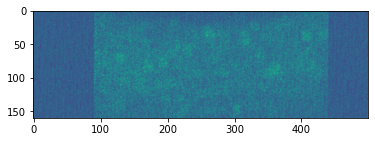

In [90]:
#Blurring / Low-pass filter / Gaussian filter
#matplotlib interpolation function (gaussian) to smooth 
plottingGaussian(78)

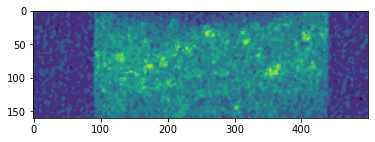

In [95]:
#Salt and pepper noise (Median filter)
from scipy import ndimage

im_med = ndimage.median_filter(frame1[78], 5)
plt.imshow(im_med)